# Testing GradientDescentRegressor Scratch Implementation

In [0]:
from sklearn.datasets import load_iris
import numpy as np

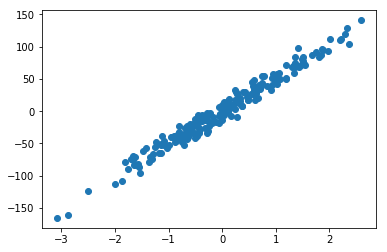

In [0]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=200, n_features=1, bias=0.5, noise=10)

plt.scatter(X, y)

In [0]:
import numpy as np 

class FullBatchGradientDescentRegressor():

    """Implementation of linear model using Gradient Descent optimizer to get 
    the minimum error value. Using all the input data at once (full batch).


    Parameters: 
    ----------

    learning_rate : float, default = 0.01
        Specifying the learning rate, or how large the step is

    step : integer, default = 1000
        Specifying the number of iterations performed


    Attributes:
    ----------

    weights_ : array-like, shape (1, n_features) if n_classes == 2 else (n_classes,\
    n_features)
        Weights assigned to the features. Use <estimator>.get_weights() to access it!

    bias_ : array-like, shape (1,) if n_classes == 2 else (n_classes,)
        Constants in decision function. Use <estimator>.get_bias() to access it!


    Methods:
    -------

    train : parameters -> (X, y)
        X : array-like
            feature matrix to train the model
        y : array-like
            target vector to train the model

    predict : parameters -> X
        X : array-like
            feature matrix to make prediction

    get_weight 
        Getting the weights or coefficient of the linear model
    
    get_bias
        Getting the bias or intercept of the linear model

    """

    weights_ = 0
    bias_ = 0


    def __init__(self, learning_rate=0.01, step=1000):

        global weights_, bias_

        weights_ = np.random.randn(X.shape[1])
        bias_ = np.random.randn(1)

        self.learning_rate = learning_rate
        self.step = step

    def train(self, X, y):

        global weights_, bias_
        
        for step in range(self.step):
            weights_ = weights_ - (self.learning_rate * FullBatchGradientDescentRegressor._calculate_gradient(X, y))
            bias_ = bias_ - (self.learning_rate * FullBatchGradientDescentRegressor._calculate_bias())

        return self


    def predict(self, X):
        y_pred = np.matmul(X, weights_) + bias_
        return y_pred


    def _calculate_gradient(X, y):

        gradient = np.empty(X.shape[1])
        for i in range(len(gradient)):
            summa = 0
            for j in range(X.shape[0]):
                summa = summa + (np.matmul(X[j], weights_) - y[j]) * X[j, i]
            summa = summa / X.shape[0]
            gradient[i] = summa

        return gradient


    def _calculate_bias():

        gradient = 0
        for j in range(X.shape[0]):
            gradient = gradient + (np.matmul(X[j], weights_) - y[j])
        return gradient / X.shape[0]
    
    def get_weights(self):
        return weights_

    def get_bias(self):
        return bias_

In [0]:
from scipy.linalg import inv
import numpy as np

class NormalEquationLinearRegression():

    """Imitation of LinearRegression estimator from sklearn.
    It doesn't take any parameters or hyperparameters. 
    This estimator will use full-batch, which means that it uses
    all the data points and makes it slow to process a lot of data 
    points.


    Parameters: 
    ----------
    |------|


    Attributes:
    ----------

    coef_ : array, shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
        Weights assigned to the features.

    intercept_ : array, shape (1,) if n_classes == 2 else (n_classes,)
        Constants in decision function.


    Methods:
    -------

    train : parameters -> (X, y)
        X : array-like
            feature matrix to train the model
        y : array-like
            target vector to train the model

    predict : parameters -> X
        X : array-like
            feature matrix to make prediction

    get_weight 
        Getting the weights or coefficient of the linear model

    get_bias
        Getting the bias or intercept of the linear model

    """


    def __init__(self):
        pass


    def train(self, X, y):	

        X = np.c_[np.ones(X.shape[0]), X]
        weights = inv(X.T.dot(X)).dot(X.T).dot(y)
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]
        return self


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(np.hstack([self.coef_, self.intercept_]))


    def get_weights():
        return self.coef_  


    def get_bias():
        return self.intercept_

In [0]:
X, y, weight = make_regression(n_samples=200, n_features=1, bias=0.5, noise=10, coef=True)

In [0]:
regressor = FullBatchGradientDescentRegressor(learning_rate=0.01, step=1000).train(X, y)
print("True weight: ", weight)
print("Prediction weight: ", regressor.get_weights())

True weight:  40.19180111451711
Prediction weight:  [40.06162108]


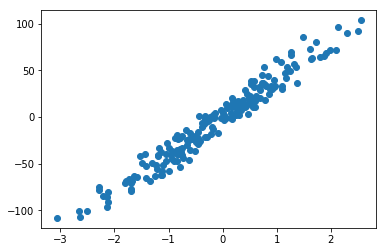

In [0]:
plt.scatter(X, y)

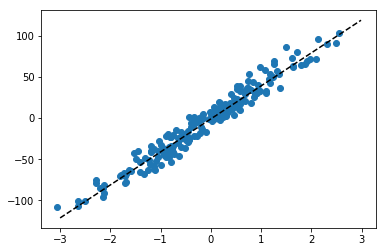

In [0]:
line = np.arange(-3, 3, 0.01).reshape(-1, 1)
y_pred = regressor.predict(line)
plt.scatter(X, y)
plt.plot(line, y_pred, linestyle='--', c='k')

---

## Implementing to Boston Housing

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor

In [0]:
bunch = load_boston()

In [0]:
X = bunch.data
y = bunch.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)